In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [22]:
# Load the dataset
customer_data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
print(customer_data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
# Select relevant features for clustering
features = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters (you may use the elbow method to find the optimal K)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data
kmeans.fit(features_scaled)

# Add cluster labels to the original dataset
customer_data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataset with cluster labels
print(customer_data.head())



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


c:\Users\Dhruv Jaiswal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


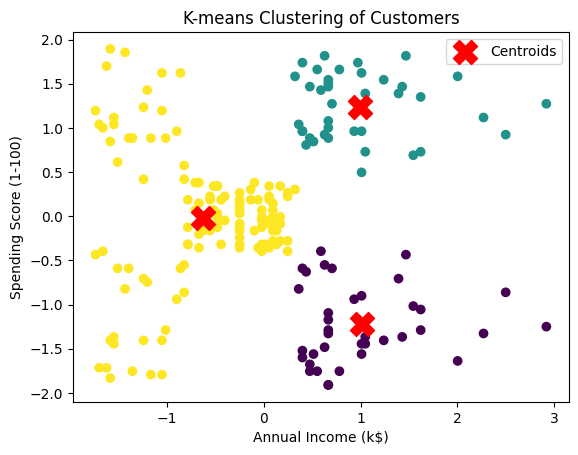

In [24]:
# Visualize the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
